In [103]:
#import libraries, etc, to handle code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'medianAskingRent_All.csv'


In [104]:
#import csv from easystreet with pricing by borough
df = pd.read_csv(file_path)


In [105]:
#drop the borough entered as NaN
df = df.dropna(subset=['Borough'])

# Define the list of columns to include (starting from the 4th column)
columns_to_include = df.columns[3:]

#print the csv top 10 rows
print(df.head(10))

              areaName    Borough      areaType  2010-01  2010-02  2010-03  \
0         All Downtown  Manhattan     submarket   3200.0   3200.0   3020.0   
1          All Midtown  Manhattan     submarket   2875.0   2800.0   2800.0   
2  All Upper East Side  Manhattan     submarket   2450.0   2450.0   2400.0   
3  All Upper Manhattan  Manhattan     submarket   1825.0   1800.0   1795.0   
4  All Upper West Side  Manhattan     submarket   2895.0   2800.0   2750.0   
5              Astoria     Queens  neighborhood   1600.0   1650.0   1620.0   
6           Auburndale     Queens  neighborhood      NaN      NaN      NaN   
7           Bath Beach   Brooklyn  neighborhood      NaN      NaN      NaN   
8    Battery Park City  Manhattan  neighborhood   3495.0   3346.0   3268.0   
9            Bay Ridge   Brooklyn  neighborhood   1350.0   1375.0   1350.0   

   2010-04  2010-05  2010-06  2010-07  ...  2022-12  2023-01  2023-02  \
0   3100.0   3100.0   3200.0   3195.0  ...   4800.0   4844.0   4951.

In [106]:
# Create a list of all unique boroughs from the "Borough" column
unique_boroughs = df['Borough'].unique()

# Initialize an empty DataFrame to store the results with column names specified directly
result_data = []


In [107]:
# Iterate through each borough
for borough in unique_boroughs:
    # Select only rows for the current borough
    borough_df = df[df['Borough'] == borough]

    # Calculate the median rental price for each date entry, excluding NaN values
    median_rental_prices = borough_df[columns_to_include].median(skipna=True).apply(lambda x: "${:.2f}".format(x))

    # Create a dictionary with borough and formatted median rental prices
    borough_data = {'Borough': borough}
    borough_data.update(median_rental_prices)

    # Append the data to the result list
    result_data.append(borough_data)

In [108]:
# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_data)


In [109]:
# Reset the index of the result DataFrame
result_df.reset_index(drop=True, inplace=True)

In [110]:
# Save the DataFrame as a CSV file
result_df.to_csv('Output_Median_Rent_DF.csv', index=False)

In [111]:
#print the new dataframe
print(result_df)


         Borough   2010-01   2010-02   2010-03   2010-04   2010-05   2010-06  \
0      Manhattan  $2895.00  $2800.00  $2750.00  $2800.00  $2800.00  $2797.50   
1         Queens  $1587.50  $1483.00  $1547.50  $1550.00  $1450.00  $1456.50   
2       Brooklyn  $2000.00  $1950.00  $2100.00  $2000.00  $2150.00  $2225.00   
3          Bronx  $1392.00  $1396.50  $1404.00  $1440.50  $1600.00  $1500.00   
4  Staten Island      $nan      $nan      $nan      $nan      $nan      $nan   

    2010-07   2010-08   2010-09  ...   2022-12   2023-01   2023-02   2023-03  \
0  $2858.00  $2895.00  $2995.00  ...  $4324.00  $4325.00  $4345.00  $4375.00   
1  $1463.00  $1550.00  $1563.00  ...  $2400.00  $2375.00  $2499.00  $2488.00   
2  $2300.00  $2200.00  $2350.00  ...  $2975.50  $3000.00  $3000.00  $3000.00   
3  $1864.50  $2062.50  $1900.00  ...  $2051.50  $2100.00  $2180.00  $2181.00   
4      $nan      $nan      $nan  ...  $2050.00  $2095.00  $2175.00  $2200.00   

    2023-04   2023-05   2023-06   2023

In [112]:
result_df

,Borough,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,Manhattan,$2895.00,$2800.00,$2750.00,$2800.00,$2800.00,$2797.50,$2858.00,$2895.00,$2995.00,...,$4324.00,$4325.00,$4345.00,$4375.00,$4449.00,$4431.00,$4412.50,$4466.50,$4472.50,$4500.00
1,Queens,$1587.50,$1483.00,$1547.50,$1550.00,$1450.00,$1456.50,$1463.00,$1550.00,$1563.00,...,$2400.00,$2375.00,$2499.00,$2488.00,$2450.00,$2500.00,$2500.00,$2499.50,$2600.00,$2603.00
2,Brooklyn,$2000.00,$1950.00,$2100.00,$2000.00,$2150.00,$2225.00,$2300.00,$2200.00,$2350.00,...,$2975.50,$3000.00,$3000.00,$3000.00,$3072.50,$3137.50,$3200.00,$3100.00,$3200.00,$3175.00
3,Bronx,$1392.00,$1396.50,$1404.00,$1440.50,$1600.00,$1500.00,$1864.50,$2062.50,$1900.00,...,$2051.50,$2100.00,$2180.00,$2181.00,$2197.50,$2150.00,$2349.50,$2284.50,$2262.50,$2299.50
4,Staten Island,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,...,$2050.00,$2095.00,$2175.00,$2200.00,$2200.00,$2100.00,$2000.00,$1900.00,$2000.00,$2063.00


In [113]:
#Read other cleaned DataFrame
new_result_df = pd.read_csv("Output_Median_Rent_DF_numbers.csv")
new_result_df

,Borough,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,Manhattan,2895.0,2800.0,2750.0,2800.0,2800,2797.5,2858.0,2895.0,2995,...,4324.0,4325,4345,4375,4449.0,4431.0,4412.5,4466.5,4472.5,4500.0
1,Queens,1587.5,1483.0,1547.5,1550.0,1450,1456.5,1463.0,1550.0,1563,...,2400.0,2375,2499,2488,2450.0,2500.0,2500.0,2499.5,2600.0,2603.0
2,Brooklyn,2000.0,1950.0,2100.0,2000.0,2150,2225.0,2300.0,2200.0,2350,...,2975.5,3000,3000,3000,3072.5,3137.5,3200.0,3100.0,3200.0,3175.0
3,Bronx,1392.0,1396.5,1404.0,1440.5,1600,1500.0,1864.5,2062.5,1900,...,2051.5,2100,2180,2181,2197.5,2150.0,2349.5,2284.5,2262.5,2299.5
4,Staten Island,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,2050.0,2095,2175,2200,2200.0,2100.0,2000.0,1900.0,2000.0,2063.0


In [114]:
#Drop first column of DataFrame so only numbers remain
numbers_result_df = new_result_df.drop(columns=['Borough'])
numbers_result_df

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,2895.0,2800.0,2750.0,2800.0,2800,2797.5,2858.0,2895.0,2995,3050.0,...,4324.0,4325,4345,4375,4449.0,4431.0,4412.5,4466.5,4472.5,4500.0
1,1587.5,1483.0,1547.5,1550.0,1450,1456.5,1463.0,1550.0,1563,1600.0,...,2400.0,2375,2499,2488,2450.0,2500.0,2500.0,2499.5,2600.0,2603.0
2,2000.0,1950.0,2100.0,2000.0,2150,2225.0,2300.0,2200.0,2350,2259.5,...,2975.5,3000,3000,3000,3072.5,3137.5,3200.0,3100.0,3200.0,3175.0
3,1392.0,1396.5,1404.0,1440.5,1600,1500.0,1864.5,2062.5,1900,1500.0,...,2051.5,2100,2180,2181,2197.5,2150.0,2349.5,2284.5,2262.5,2299.5
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,...,2050.0,2095,2175,2200,2200.0,2100.0,2000.0,1900.0,2000.0,2063.0


In [121]:
#Create x and y axes
time = ('2009-12', '2023-09', 12)
manhattan = numbers_result_df.loc[0]
queens = numbers_result_df.loc[1]
brooklyn = numbers_result_df.loc[2]
bronx = numbers_result_df.loc[3]
staten_island = result_df.loc[4]



ValueError: x and y must have same first dimension, but have shapes (3,) and (165,)

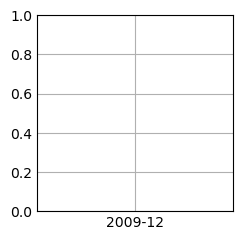

In [122]:
#Plot the chart, add styling
manhattan_median = plt.plot(time, manhattan, color="red", label="Manhattan")
queens_median = plt.plot(time, queens, color="purple", label="Queens")
brooklyn_median = plt.plot(time, brooklyn, color="mediumblue", label="Brooklyn")
bronx_median = plt.plot(time, bronx, color="green", label="Bronx")
staten_island_median = plt.plot(time, staten_island, color="yellow", label="Staten Island")



#Labels to axes
plt.title("Median Asking Price of Units Per Month")
plt.xlabel("Year/Month")
plt.ylabel("Median Asking Price Per Unit")
# plt.yticks
# plt.ylim
plt.grid()

#Create Legend for chart
plt.legend()
plt.show()

